In [1]:
# importing dependencies here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
data_path = os.path.join("data", "king_county_house_data.csv")

In [3]:
df = pd.read_csv(data_path).drop(["id"], axis=1)

In [5]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Data Analysis

In [6]:
# inspecting the variable types
df.dtypes

date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

It is a combination of categorical and numerical (discreate and continuous) variable types in the dataset. Numerical variables are defined as int and float. Categorical variables are defined as object. 

#### Finding Categorical variables

In [9]:
categorical = [var for var in df.columns if df[var].dtype == 'O' ]
print('There are {} categorical variables'.format(len(categorical)))

There are 1 categorical variables


Currently there is only 1 categorical variable in the dataset and that is date but clearly there seem to be few more variables that should be converted into categorical variables later in this code.

In [11]:
df[categorical].head(2)

,date
0,20141013T000000
1,20141209T000000


#### Finding temporal variables
There are a few variables in the dataset that are temporal. They indicate the year in which something happened. We shouldn't use these variables straightaway for model building. We should instead transform them to capture some sort of time information. Let's inspect these temporal variables.

In [14]:
year_vars = [var for var in df.columns if "yr" in var or "Year" in var]
year_vars

['yr_built', 'yr_renovated']

In [16]:
df[year_vars].head(5)

,yr_built,yr_renovated
0,1955,0
1,1951,1991
2,1933,0
3,1965,0
4,1987,0


We have another temporal variable that is Date. Let's see if date is having any impact on the price. 

In [34]:
# extracting month from the date columm and adding it to the dataframe
df["month_sold"] = df["date"].str[4:6]
df.head(3)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,10
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,12
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,02


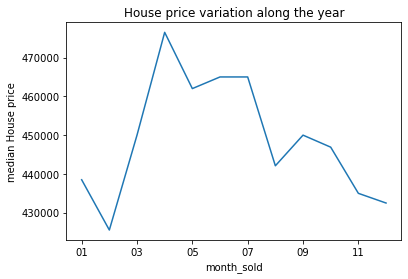

In [40]:
# plotting month and price to find which months have higher house prices
df.groupby("month_sold")["price"].median().plot()
plt.title('House price variation along the year')
plt.ylabel('median House price')
plt.show()

The price seems to vary depending on the month in which the house is sold. We can see that house price is highest in April and lowest in February.

#### Finding discrete variables
To identify discrete variables, I will select from all the numerical ones, those that contain a finite and small number of distinct values.

In [45]:
# let's visualise the values of the discrete variables
discrete = []

numerical = [var for var in df.columns if df[var].dtype != "O"]

for var in numerical:
    if len(df[var].unique()) < 20 and var not in year_vars:
        discrete.append(var)
        print(var, "values", df[var].unique())
        
print(f"\nThere are {len(discrete)} discrete variables in the dataset.")

bedrooms values [ 3  2  4  5  1  6  7  0  8  9 11 10 33]
floors values [1.  2.  1.5 3.  2.5 3.5]
waterfront values [0 1]
view values [0 3 4 2 1]
condition values [3 5 4 1 2]
grade values [ 7  6  8 11  9  5 10 12  4  3 13  1]

There are 6 discrete variables in the dataset.


There seem to be a unusally high number of bedrooms (11 and 33). We will be inspecting it further later in the code.

#### Finding Continuous variables

In [50]:
# finding continuous variables

numerical = [var for var in numerical if var not in discrete and var != "price" and var not in year_vars]

print(f"There are {len(numerical)} continuous (numerical) variables.")
print("\n", numerical)

There are 10 continuous (numerical) variables.

 ['bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


Number of bathrooms will need further inspection later in the code as it seem to have more than 20 unique values.

In [52]:
df["bathrooms"].unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 0.  , 1.25, 5.25, 6.  , 0.5 ,
       5.5 , 6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

Also, some of these contiuous variables will need encoding since they seem to have high cardinality like zipcode, lat, long.

In [56]:
df["zipcode"].value_counts().sort_values(ascending=False)

98103    602
98038    590
98115    583
98052    574
98117    553
        ... 
98102    105
98010    100
98024     81
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64